In [1]:
import matplotlib.pyplot as plt 
import matplotlib as mpl 

%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False 

In [3]:
from sklearn.manifold import TSNE 
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.corpus import stopwords 
cachedStopWords = stopwords.words("english")

from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer

from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']

newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)

newsgroups_test = fetch_20newsgroups(subset='test',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)

X_train = newsgroups_train.data 
y_train = newsgroups_train.target 

X_test = newsgroups_test.data 
y_test = newsgroups_test.target 

RegTok = RegexpTokenizer("[\w']{3,}")
english_stops = set(stopwords.words('english'))

def tokenizer(text):
    tokens = RegTok.tokenize(text.lower())
    words = [word for word in tokens if (word not in english_stops) and len(word) > 2 ]
    features = (list(map(lambda token: PorterStemmer().stem(token), words)))
    return features


tfidf = TfidfVectorizer(tokenizer=tokenizer)

x_train_tfidf = tfidf.fit_transform(X_train)
x_test_tfidf = tfidf.transform(X_test)

TSNE dimentsion: (2034, 3)


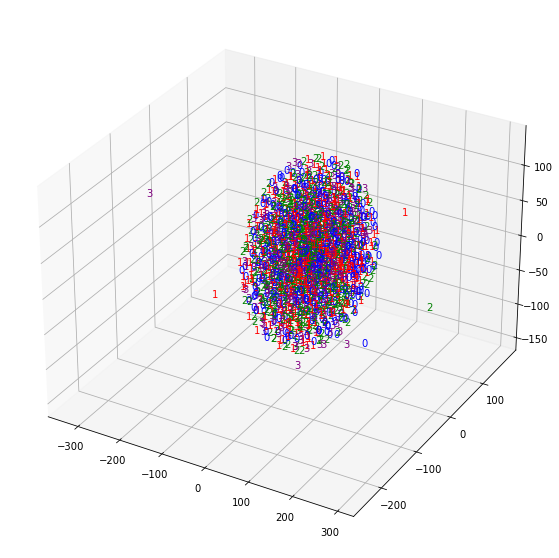

In [16]:
tsne = TSNE(n_components=3, random_state=7)

tsne_tfidf = tsne.fit_transform(x_train_tfidf)
print('TSNE dimentsion:', tsne_tfidf.shape)

def tsne_graph(tsne_2, label):
    colors = {0:'blue', 1:'red', 2:'green', 3:'purple'}
    x = tsne_2[:,0]
    y = tsne_2[:,1]
    z = tsne_2[:,2]
    
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111, projection = '3d')

    ax.set_xlim(min(x), max(x))
    ax.set_ylim(min(y), max(y))
    ax.set_zlim(min(z), max(z))
    
    for i in range(len(x)):
        if (min(x) < x[i] < max(x)) and (min(y) < y[i] < max(y)) and (min(z) < z[i] < max(z)):
            ax.text(x[i], y[i], z[i], label[i], color = colors[label[i]])
    plt.show()
    
tsne_graph(tsne_tfidf, y_train)

LSA Converted X shape: (2034, 100)
Sum of explained variance ratio: 0.209
TSNE dimension: (2034, 3)
#Selected categories: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


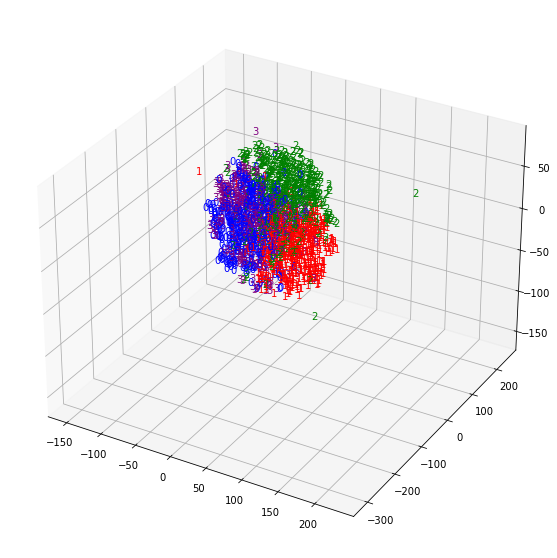

In [18]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100, random_state=1)

x_train_lsa = svd.fit_transform(x_train_tfidf)
x_test_lsa = svd.transform(x_test_tfidf)

print('LSA Converted X shape:', x_train_lsa.shape)
print(f'Sum of explained variance ratio: {svd.explained_variance_ratio_.sum():.3f}')

tsne_lsa = tsne.fit_transform(x_train_lsa)
print('TSNE dimension:', tsne_lsa.shape)
print('#Selected categories:', newsgroups_train.target_names)

tsne_graph(tsne_lsa, y_train)

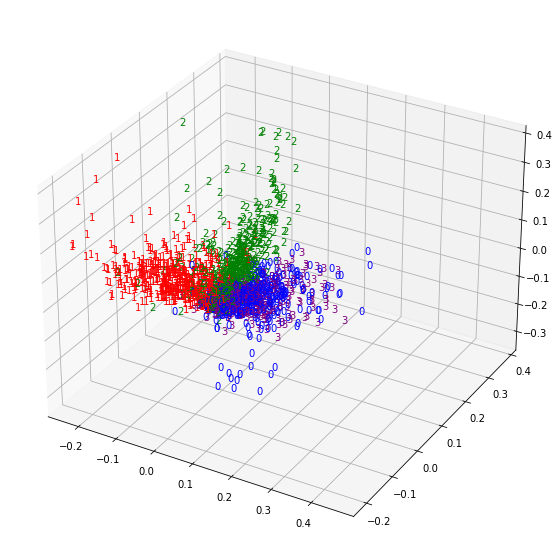

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state = 7)


pca_lsa = pca.fit_transform(x_train_lsa)


tsne_graph(pca_lsa, y_train)

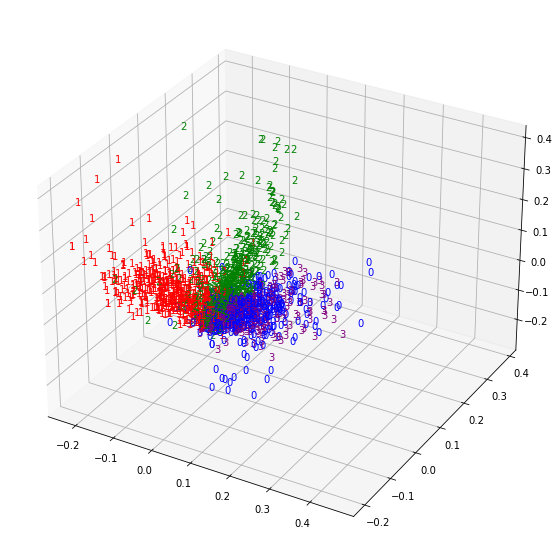

In [24]:
pca_tfidf = pca.fit_transform(x_train_tfidf.toarray())

tsne_graph(pca_tfidf, y_train)